# BELL STATES

### SEPARABLE & ENTANGLED STATES

$ \vert \Phi \otimes \Psi \rangle = \sum_{n,m} \alpha_{n} \beta_{m} \vert \varphi_{n} \otimes \psi_{m}\rangle $ 

$ \vert \Theta \rangle = \sum_{n,m} \gamma_{n m} \vert \varphi_{n} \otimes \psi_{m}\rangle $ 

The vector $\vert \Theta \rangle$ can not be written as a tensor product $\vert \Phi \otimes \Psi \rangle $ if it 
will not be possible to factorize $ \gamma_{n m} $ in form $ \alpha_{n} \beta_{m} $

The state vectors that can be written as a tensor product form a subset of $ \mathcal{H}^N \otimes \mathcal{H}^M $
A state vector that cannot be written as  a tensor product is an entangled state


$ \vert \Phi_1 \rangle = \alpha_0 \; \vert \varphi_0 \rangle + \alpha_1 \; \vert \varphi_1 \rangle $ 

$ \vert \Phi_2 \rangle = \beta_0 \; \vert \varphi_0 \rangle + \beta_1 \; \vert \varphi_1 \rangle $ 

$ \vert \Phi_1  \otimes \Phi_2 \rangle = \alpha_0 \beta_0  \; \vert \varphi_0 \varphi_0 \rangle  + \alpha_0 \beta_1  \; \vert \varphi_0 \varphi_1 \rangle  + \alpha_1 \beta_0  \; \vert \varphi_1 \varphi_0 \rangle + \alpha_1 \beta_1  \; \vert \varphi_1 \varphi_1 \rangle $

$ \vert \Theta \rangle = \gamma_1  \; \vert \varphi_0 \varphi_0 \rangle  + \gamma_2  \; \vert \varphi_0 \varphi_1 \rangle  + \gamma_3  \; \vert \varphi_1 \varphi_0 \rangle + \gamma_4  \; \vert \varphi_1 \varphi_1 \rangle $

\begin{cases}
    \alpha_0 \beta_0 = \gamma_1 \\
    \alpha_0 \beta_1 = \gamma_2 \\
    \alpha_1 \beta_0 = \gamma_3 \\
    \alpha_1 \beta_1 = \gamma_4 \\
\end{cases}

$ \alpha_0 \beta_0 \alpha_1 \beta_1 = \alpha_0 \beta_1 \alpha_1 \beta_0 $

$ \gamma_1 \gamma_4 = \gamma_2 \gamma_3 \implies $  separable states 

### BENNETT'S LAWS
**1 qubit $ \succeq $ 1 bit**

**1 qubit $ \succeq $ 1 ebit**

**1 ebit + 1 qubit $ \succeq $ 2 bits**

**1 ebit + 2 bits $ \succeq $ 1 qubit**


>**qubit**: transferring one-qubit quantum system <br />
**bit**: transferring one-bit message <br />
**ebit**: consuming of bipartite entanglement (contained in a maximally entangled two-qubit state) 

### MAXIMALLY ENTANGLED, PURE TWO-QUBIT BELL STATES


$ \vert B_{00} \rangle = \frac{\vert 0 0 \rangle + \vert 1 1 \rangle}{\sqrt{2}} $

$ \vert B_{01} \rangle = \frac{\vert 0 1 \rangle + \vert 1 0 \rangle}{\sqrt{2}} $

$ \vert B_{10} \rangle = \frac{\vert 0 0 \rangle - \vert 1 1 \rangle}{\sqrt{2}} $

$ \vert B_{11} \rangle = \frac{\vert 0 1 \rangle - \vert 1 0 \rangle}{\sqrt{2}} $

# GENERATING AN EPR PAIRS

**USING IBM'S QISKIT PYTHON  LIBRARY AND IBM'S QPU CLOUD**


Firstly, I use the Statevector Simulator to "spy" qubit state before measurement, then the quantum circuit is executed on QPU.

***!!!*** ***Qiskit*** uses an ordering in which the nth qubit is on the left side of the tensor product in quantum register

$ \vert \varphi \rangle = \vert \varphi_{n-1} \rangle  \otimes  \vert \varphi_1 \rangle \; \otimes ... \otimes \;  \vert \varphi_{0} \rangle$

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram

from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

#IBMQ.save_account('TOKEN')
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')


#1 Generating an EPR Pair

def generating_epr_pair(settings):
    
    qr = QuantumRegister(2, "qbit")
    cr = ClassicalRegister(2, name="cbit")
    qc = QuantumCircuit(qr, cr)
    
    if settings[1] == "1":
        qc.x(0) 
    if settings[0] == "1":
        qc.x(1) 
    
    qc.h(1) #Hadamard Gate
    state1 = Statevector(qc)
    
    qc.cx(1,0) #CNOT Gate
    state2 = Statevector(qc)
    
    return qc, qr, cr, state1, state2


#2 Measurement

def measurement(qc, qr, cr):
    
    qc.measure(qr,cr)

    backend    = least_busy(provider.backends(
        filters = lambda b: 
        b.configuration().n_qubits >= 2 and not 
        b.configuration().simulator and 
        b.status().operational == True))
    print(f"Least Busy: {backend}")

    executed    = execute(qc, backend = backend)
    job_monitor(executed, interval = 2)
    result      = executed.result()
    results_qpu = result.get_counts(qc)
    
    return results_qpu


def output(qc, state1, state2, results_qpu):

    print(f"\n---- H|{settings[0]}> x |{settings[1]}> ----------------------------------\n")
    display(state1.draw('latex'))

    print(f"\n---- CNOT(H|{settings[0]}> x |{settings[1]}>)-----------------------------\n")
    display(state2.draw('latex'))
    
    print(f"\n---- SHOW CIRCUIT --------------------------------------------------------\n")
    display(qc.draw(output='latex', scale=1))

    print(f"\n---- IBM QPU 1024 SHOTS --------------------------------------------------\n")
    print(results_qpu)
    display(plot_histogram(results_qpu, color='midnightblue', title="IBMQ: 1024 SHOTS") )


ibmqfactory.load_account:WARNING:2022-05-29 20:11:31,466: Credentials are already in use. The existing account in the session will be replaced.


## $B_{00}$  


$ \vert 0 \rangle  \otimes \vert 0 \rangle = \vert 0 0 \rangle$

$ H \vert 0 \rangle  \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle + \vert 1 \rangle \big) \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle + \vert 1 0\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle + \vert 1 0\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle + \vert 1 1\rangle \big) $ 


$$ \vert B_{00} \rangle = \frac{\vert 0 0 \rangle + \vert 1 1 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} 

\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
\end{pmatrix} +


\begin{pmatrix}
0 \\
0 \\
0 \\
1 \\
\end{pmatrix} =

\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
0 \\
0 \\
\frac{1}{\sqrt{2}} \\
\end{pmatrix}

$$

Least Busy: ibmq_bogota
Job Status: job has successfully run

---- H|0> x |0> ----------------------------------



<IPython.core.display.Latex object>


---- CNOT(H|0> x |0>)-----------------------------



<IPython.core.display.Latex object>


---- SHOW CIRCUIT --------------------------------------------------------



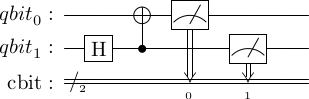


---- IBM QPU 1024 SHOTS --------------------------------------------------

{'00': 1958, '01': 138, '10': 221, '11': 1683}


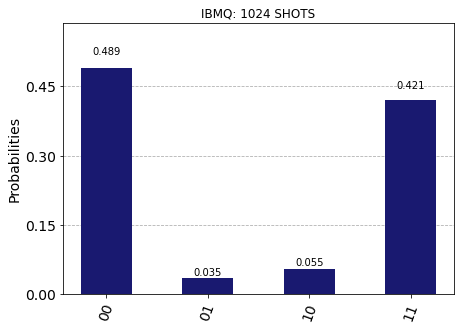

In [18]:
settings = "00"

qc, qr, cr, state1, state2  = generating_epr_pair(settings)

results_qpu = measurement(qc, qr, cr)

output(qc, state1, state2, results_qpu)

## $ B_{01} $



$ \vert 0 \rangle  \otimes \vert 1 \rangle = \vert 0 1 \rangle$

$ H \vert 0 \rangle  \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle + \vert 1 \rangle \big) \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle + \vert 1 1\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle + \vert 1 1\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle + \vert 1 0\rangle \big) $ 


$$ \vert B_{01} \rangle = \frac{\vert 0 1 \rangle + \vert 1 0 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} 

\begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix} +
 

\begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
\end{pmatrix} =


\begin{pmatrix}
0 \\
\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} \\
0 \\
\end{pmatrix}

$$

Least Busy: ibmq_bogota
Job Status: job has successfully run

---- H|0> x |1> ----------------------------------



<IPython.core.display.Latex object>


---- CNOT(H|0> x |1>)-----------------------------



<IPython.core.display.Latex object>


---- SHOW CIRCUIT --------------------------------------------------------



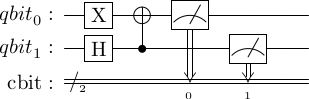


---- IBM QPU 1024 SHOTS --------------------------------------------------

{'00': 332, '01': 1752, '10': 1812, '11': 104}


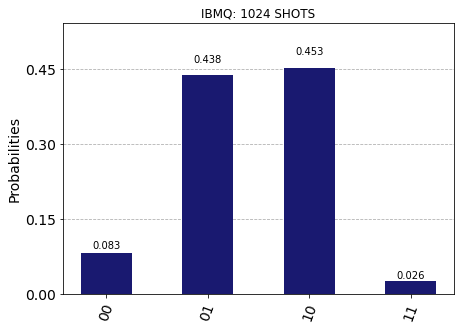

In [19]:
settings = "01"

qc, qr, cr, state1, state2  = generating_epr_pair(settings)
results_qpu = measurement(qc, qr, cr)

output(qc, state1, state2, results_qpu)

## $ B_{10} $



$ \vert 1 \rangle  \otimes \vert 0 \rangle = \vert 1 0 \rangle$

$ H \vert 1 \rangle  \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle - \vert 1 \rangle \big) \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle - \vert 1 0\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle - \vert 1 0\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle - \vert 1 1\rangle \big) $ 


$$ \vert B_{10} \rangle = \frac{\vert 0 0 \rangle - \vert 1 1 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} 

\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
\end{pmatrix} -
 
\begin{pmatrix}
0 \\
0 \\
0 \\
1 \\
\end{pmatrix} =
 
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
0 \\
0 \\
\frac{-1}{\sqrt{2}} \\
\end{pmatrix}

$$

Least Busy: ibmq_bogota
Job Status: job has successfully run

---- H|1> x |0> ----------------------------------



<IPython.core.display.Latex object>


---- CNOT(H|1> x |0>)-----------------------------



<IPython.core.display.Latex object>


---- SHOW CIRCUIT --------------------------------------------------------



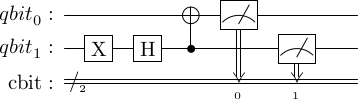


---- IBM QPU 1024 SHOTS --------------------------------------------------

{'00': 1911, '01': 160, '10': 211, '11': 1718}


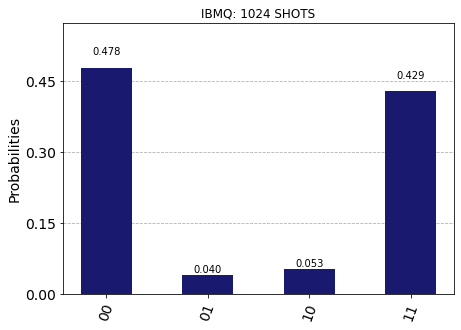

In [22]:
settings = "10"

qc, qr, cr, state1, state2  = generating_epr_pair(settings)
results_qpu = measurement(qc, qr, cr)

output(qc, state1, state2, results_qpu)

## $ B_{11} $


$ \vert 1 \rangle  \otimes \vert 1 \rangle = \vert 1 1 \rangle$

$ H \vert 1 \rangle  \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle - \vert 1 \rangle \big) \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle - \vert 1 1\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle - \vert 1 1\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle - \vert 1 0\rangle \big) $



$$ \vert B_{11} \rangle = \frac{\vert 0 1 \rangle - \vert 1 0 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} 

\begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix} -

\begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
\end{pmatrix} =

\begin{pmatrix}
0 \\
\frac{1}{\sqrt{2}} \\
\frac{-1}{\sqrt{2}} \\
0 \\
\end{pmatrix}
$$

Least Busy: ibmq_lima
Job Status: job has successfully run

---- H|1> x |1> ----------------------------------



<IPython.core.display.Latex object>


---- CNOT(H|1> x |1>)-----------------------------



<IPython.core.display.Latex object>


---- SHOW CIRCUIT --------------------------------------------------------



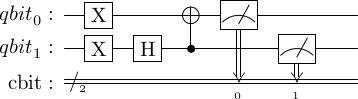


---- IBM QPU 1024 SHOTS --------------------------------------------------

{'00': 154, '01': 1946, '10': 1867, '11': 33}


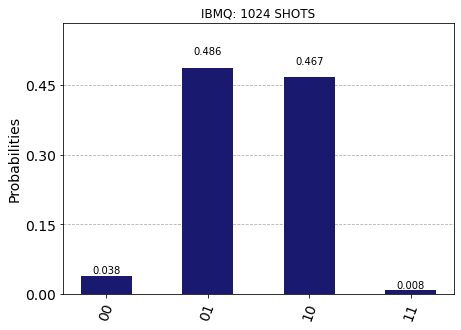

In [23]:
settings = "11"

qc, qr, cr, state1, state2  = generating_epr_pair(settings)
results_qpu = measurement(qc, qr, cr)

output(qc, state1, state2, results_qpu)

#### BIBLIOGRAPHY

[1] Qiskit textbook. http://qiskit.org/textbook-beta, 2021. [Online; accessed: 2021-09-03].

[2] Ryszard Horodecki, Paweł Horodecki, Michał Horodecki, and Karol
Horodecki. Quantum entanglement. *Rev. Mod. Phys.*, **81**:865-942, Jun 2009.

[3] Michel Le Bellac. *Quantum Physics.* Cambridge University Press, Cambridge, 2006.

[4] Michel Le Bellac. *Wstęp do informatyki kwantowej*. Wydawnictwo Naukowe PWN, Warszawa, 2011.